In [2]:
import pymysql.cursors
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
%matplotlib inline

color = sns.color_palette()

In [3]:
import sqlite3
conn = sqlite3.connect('instacart.db')

In [14]:
aisles = pd.read_sql("select * from aisles", con= conn)

In [5]:
orders = pd.read_sql("select * from orders join order_products on order_products.order_id = orders.order_id join products on products.product_id = order_products.product_id join aisles on products.aisle_id = aisles.aisle_id join departments on departments.department_id = products.department_id", con= conn)

In [6]:
df = orders.loc[:,~orders.columns.duplicated()]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3923788 entries, 0 to 3923787
Data columns (total 15 columns):
order_id                  int64
user_id                   int64
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
product_id                int64
add_to_cart_order         int64
reordered                 int64
index                     int64
product_name              object
aisle_id                  int64
department_id             int64
aisle                     object
department                object
dtypes: float64(1), int64(11), object(3)
memory usage: 449.0+ MB


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3923788 entries, 0 to 3923787
Data columns (total 21 columns):
order_id                  int64
user_id                   int64
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
order_id                  int64
product_id                int64
add_to_cart_order         int64
reordered                 int64
index                     int64
product_id                int64
product_name              object
aisle_id                  int64
department_id             int64
index                     int64
aisle_id                  int64
aisle                     object
index                     int64
department_id             int64
department                object
dtypes: float64(1), int64(17), object(3)
memory usage: 628.7+ MB


In [32]:
order_products = pd.read_sql("select * from orders",con=conn)

In [41]:
order_products

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2168274,2,1,2,11,NaN
1,1501582,2,2,5,10,10.0
2,1901567,2,3,1,10,3.0
3,738281,2,4,2,10,8.0
4,1673511,2,5,3,11,8.0
5,1199898,2,6,2,9,13.0
6,3194192,2,7,2,12,14.0
7,788338,2,8,1,15,27.0
8,1718559,2,9,2,9,8.0
9,1447487,2,10,1,11,6.0


In [40]:
len(order_products['user_id'].unique())

25000

/Users/ashley/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


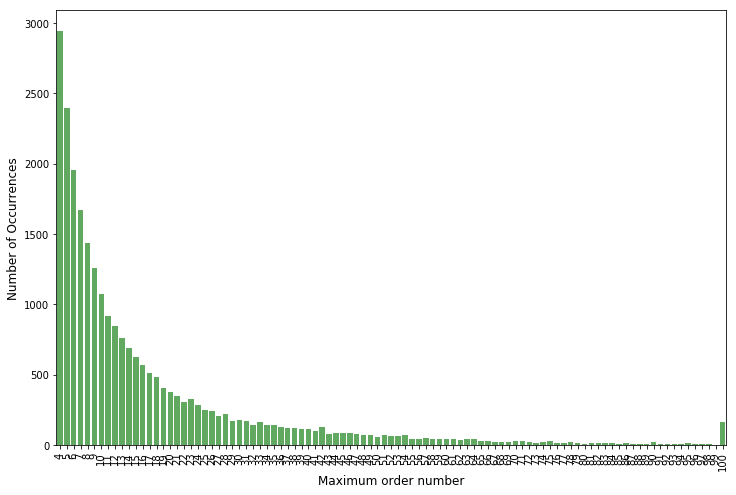

In [44]:
cnt_srs = order_products.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

/Users/ashley/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


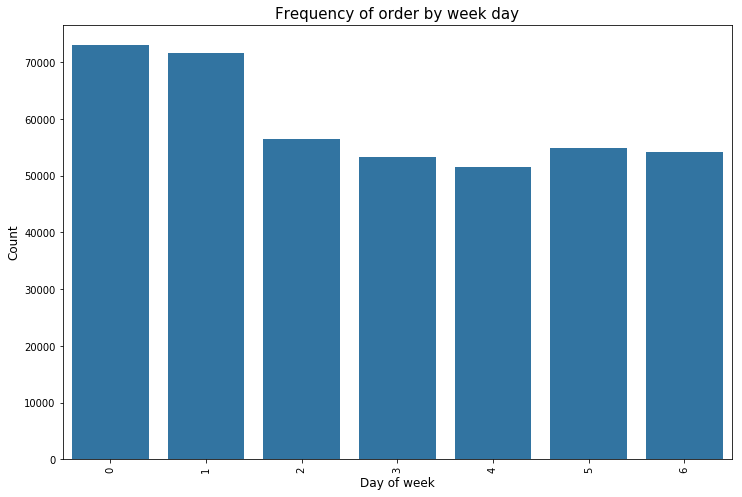

In [46]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=order_products, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

/Users/ashley/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


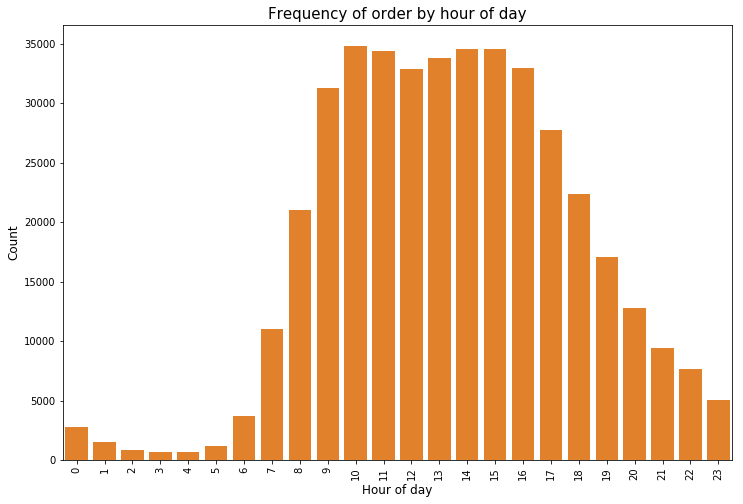

In [48]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=order_products, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

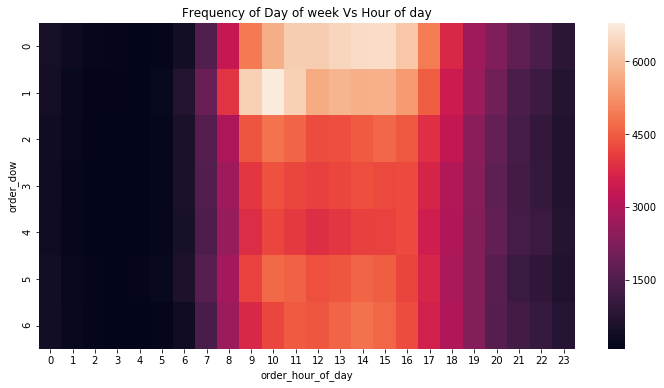

In [49]:
grouped_df = order_products.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

/Users/ashley/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


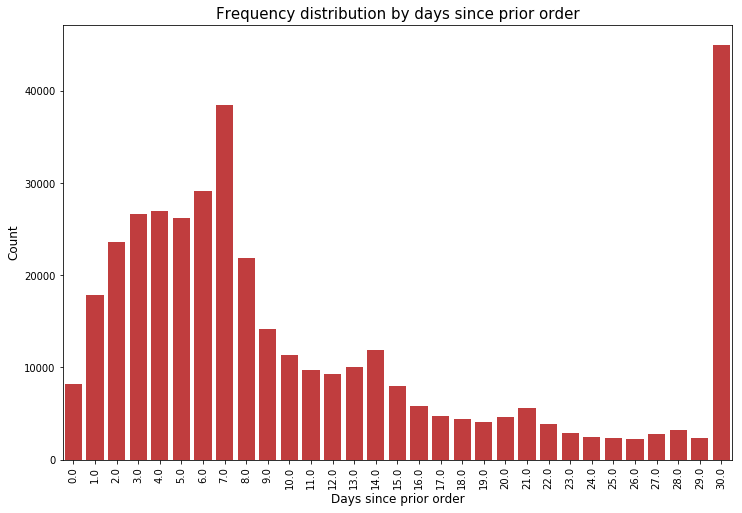

In [51]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=order_products, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

In [55]:
order_products.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2168274,2,1,2,11,NaN
1,1501582,2,2,5,10,10.0
2,1901567,2,3,1,10,3.0
3,738281,2,4,2,10,8.0
4,1673511,2,5,3,11,8.0


In [69]:
orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_id,product_id,add_to_cart_order,reordered,...,product_name,aisle_id,department_id,index,aisle_id,aisle,index,department_id,department,organic
0,2168274,2,1,2,11,NaN,2168274,12000,4,0,...,Baked Organic Sea Salt Crunchy Pea Snack,72,13,71,72,condiments,12,13,pantry,1
1,2168274,2,1,2,11,NaN,2168274,13176,12,0,...,Bag of Organic Bananas,24,4,23,24,fresh fruits,3,4,produce,1
2,2168274,2,1,2,11,NaN,2168274,16589,7,0,...,Plantain Chips,107,19,106,107,chips pretzels,18,19,snacks,0
3,2168274,2,1,2,11,NaN,2168274,20574,3,0,...,Roasted Turkey,96,20,95,96,lunch meat,19,20,deli,0
4,2168274,2,1,2,11,NaN,2168274,22474,6,0,...,Cheddar Bunnies Snack Crackers,78,19,77,78,crackers,18,19,snacks,0
5,2168274,2,1,2,11,NaN,2168274,27344,9,0,...,Uncured Genoa Salami,96,20,95,96,lunch meat,19,20,deli,0
6,2168274,2,1,2,11,NaN,2168274,27966,11,0,...,Organic Raspberries,123,4,122,123,packaged vegetables fruits,3,4,produce,1
7,2168274,2,1,2,11,NaN,2168274,30489,10,0,...,Original Hummus,67,20,66,67,fresh dips tapenades,19,20,deli,0
8,2168274,2,1,2,11,NaN,2168274,32792,1,0,...,Chipotle Beef & Pork Realstick,23,19,22,23,popcorn jerky,18,19,snacks,0
9,2168274,2,1,2,11,NaN,2168274,35917,8,0,...,Organic Just Concord Grape Juice,98,7,97,98,juice nectars,6,7,beverages,1


In [12]:
df['organic'] = df['product_name'].apply(lambda x: x.lower()).str.contains('organic').astype(np.int8)

/Users/ashley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_all = orders.T.drop_duplicates().T

In [ ]:
orders_df = orders.loc[:,~orders.columns.duplicated()]

In [73]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3923788 entries, 0 to 3923787
Data columns (total 20 columns):
user_id                   int64
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
product_id                int64
add_to_cart_order         int64
reordered                 int64
index                     int64
product_id                int64
product_name              object
aisle_id                  int64
department_id             int64
index                     int64
aisle_id                  int64
aisle                     object
index                     int64
department_id             int64
department                object
organic                   int8
dtypes: float64(1), int64(15), int8(1), object(3)
memory usage: 572.5+ MB


/Users/ashley/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0,0.5,'% of Orders')

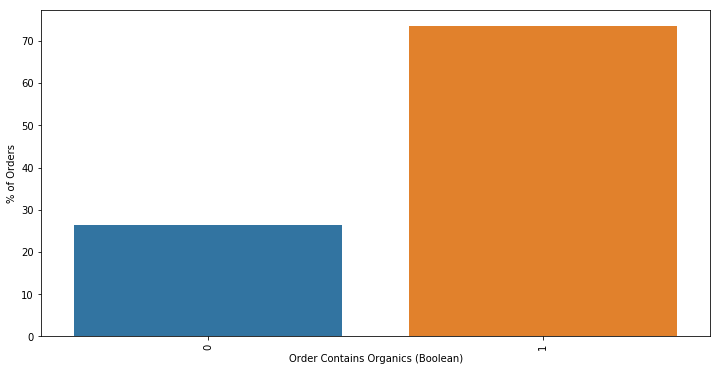

In [13]:
org = df.groupby('order_id')['organic'].aggregate("max").value_counts()

# plot it
plt.figure(figsize=(12, 6))
sns.barplot(org.index, org / org.sum() * 100)
plt.xticks(rotation='vertical')
plt.xlabel('Order Contains Organics (Boolean)')
plt.ylabel('% of Orders')

In [14]:
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,index,product_name,aisle_id,department_id,aisle,department,organic
0,2168274,2,1,2,11,NaN,12000,4,0,11999,Baked Organic Sea Salt Crunchy Pea Snack,72,13,condiments,pantry,1
1,2168274,2,1,2,11,NaN,13176,12,0,13175,Bag of Organic Bananas,24,4,fresh fruits,produce,1
2,2168274,2,1,2,11,NaN,16589,7,0,16588,Plantain Chips,107,19,chips pretzels,snacks,0
3,2168274,2,1,2,11,NaN,20574,3,0,20573,Roasted Turkey,96,20,lunch meat,deli,0
4,2168274,2,1,2,11,NaN,22474,6,0,22473,Cheddar Bunnies Snack Crackers,78,19,crackers,snacks,0
5,2168274,2,1,2,11,NaN,27344,9,0,27343,Uncured Genoa Salami,96,20,lunch meat,deli,0
6,2168274,2,1,2,11,NaN,27966,11,0,27965,Organic Raspberries,123,4,packaged vegetables fruits,produce,1
7,2168274,2,1,2,11,NaN,30489,10,0,30488,Original Hummus,67,20,fresh dips tapenades,deli,0
8,2168274,2,1,2,11,NaN,32792,1,0,32791,Chipotle Beef & Pork Realstick,23,19,popcorn jerky,snacks,0
9,2168274,2,1,2,11,NaN,35917,8,0,35916,Organic Just Concord Grape Juice,98,7,juice nectars,beverages,1


In [19]:
df.groupby('user_id')['order_id'].count().describe()

count    25000.000000
mean       156.951520
std        204.548183
min          3.000000
25%         39.000000
50%         83.000000
75%        186.000000
max       2561.000000
Name: order_id, dtype: float64

In [25]:
reorders = df[df['reordered'] == 1]
not_reordered = df[df['reordered'] == 0]
len(reorders)/len(not_reordered)

1.4302266166308575

/Users/ashley/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0,0.5,'% of Orders')

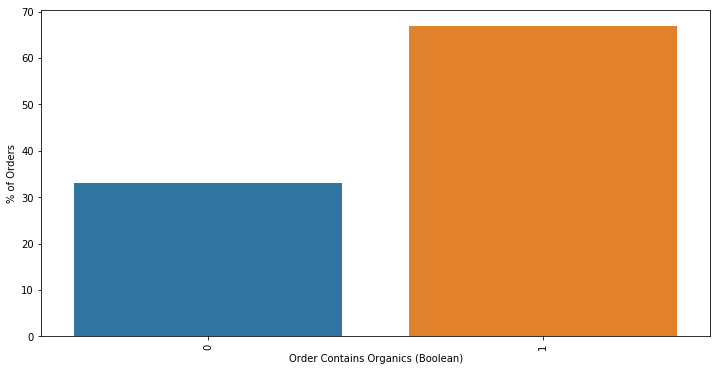

In [22]:
org = reorders.groupby('order_id')['organic'].aggregate("max").value_counts()

# plot it
plt.figure(figsize=(12, 6))
sns.barplot(org.index, org / org.sum() * 100)
plt.xticks(rotation='vertical')
plt.xlabel('Order Contains Organics (Boolean)')
plt.ylabel('% of Orders')

/Users/ashley/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0,0.5,'% of Orders')

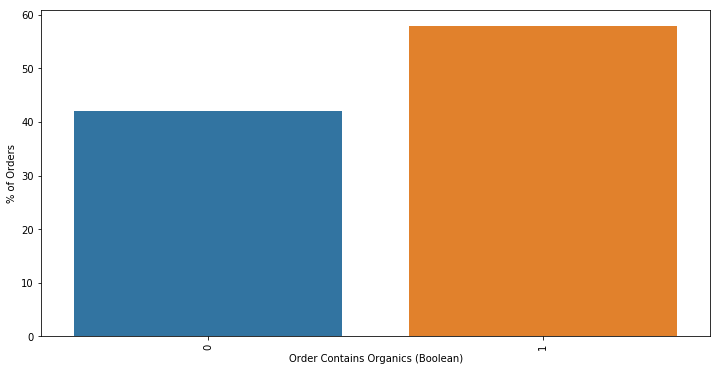

In [24]:
org = not_reordered.groupby('order_id')['organic'].aggregate("max").value_counts()

# plot it
plt.figure(figsize=(12, 6))
sns.barplot(org.index, org / org.sum() * 100)
plt.xticks(rotation='vertical')
plt.xlabel('Order Contains Organics (Boolean)')
plt.ylabel('% of Orders')

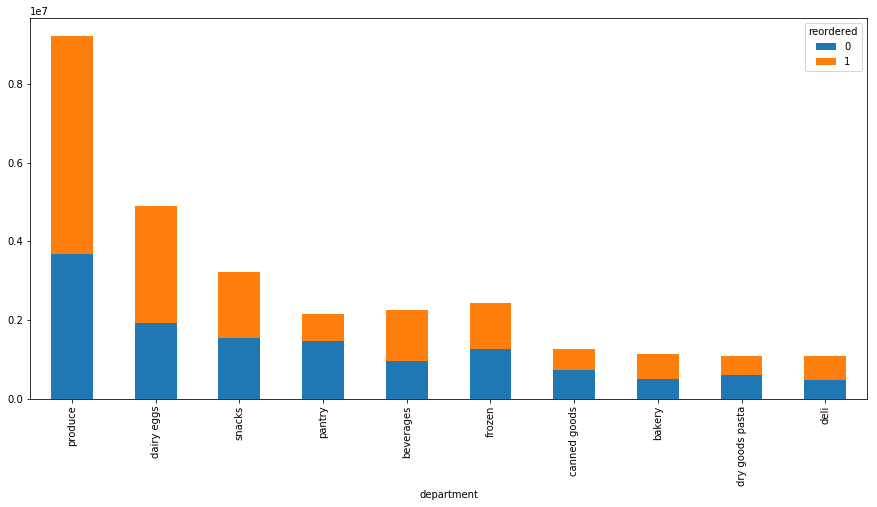

In [39]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['department','reordered'])['add_to_cart_order'].sum().nlargest(20).unstack().plot(kind='bar', ax=ax, stacked=True)

In [34]:
not_reordered.groupby('department')['add_to_cart_order'].sum().nlargest(20)

department
produce            3675818
dairy eggs         1912174
snacks             1535886
pantry             1455903
frozen             1255229
beverages           952862
canned goods        718620
dry goods pasta     606757
bakery              485715
deli                482837
household           467338
breakfast           374168
meat seafood        340136
personal care       331522
babies              265874
international       211503
missing              52292
alcohol              49463
pets                 41088
other                23821
Name: add_to_cart_order, dtype: int64

In [31]:
reorders.groupby('department')['add_to_cart_order'].sum().nlargest(20)

department
produce            5541109
dairy eggs         2973700
snacks             1678416
beverages          1308094
frozen             1183101
pantry              702534
bakery              647900
deli                600315
canned goods        538964
dry goods pasta     468226
breakfast           396821
meat seafood        379925
babies              302195
household           287206
personal care       141228
international       113539
alcohol              52905
pets                 48875
missing              26126
bulk                 17762
Name: add_to_cart_order, dtype: int64

In [29]:
reorders.groupby('aisle')['add_to_cart_order'].sum().nlargest(20)

aisle
fresh fruits                     2105432
fresh vegetables                 2056986
packaged vegetables fruits       1068172
yogurt                            871832
packaged cheese                   575731
milk                              441038
chips pretzels                    430228
water seltzer sparkling water     415696
soy lactosefree                   326852
bread                             325064
energy granola bars               305100
refrigerated                      302252
frozen produce                    287769
baby food formula                 284459
crackers                          270763
eggs                              228636
ice cream ice                     227657
lunch meat                        223189
cereal                            213072
fresh herbs                       210153
Name: add_to_cart_order, dtype: int64

In [32]:
reorders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,index,product_name,aisle_id,department_id,aisle,department,organic
18,1501582,2,2,5,10,10.0,47766,4,1,47765,Organic Avocado,24,4,fresh fruits,produce,1
20,1901567,2,3,1,10,3.0,20574,3,1,20573,Roasted Turkey,96,20,lunch meat,deli,0
22,1901567,2,3,1,10,3.0,32792,2,1,32791,Chipotle Beef & Pork Realstick,23,19,popcorn jerky,snacks,0
23,1901567,2,3,1,10,3.0,47766,1,1,47765,Organic Avocado,24,4,fresh fruits,produce,1
29,738281,2,4,2,10,8.0,32792,2,1,32791,Chipotle Beef & Pork Realstick,23,19,popcorn jerky,snacks,0
48,1673511,2,5,3,11,8.0,47766,13,1,47765,Organic Avocado,24,4,fresh fruits,produce,1
51,1199898,2,6,2,9,13.0,9681,3,1,9680,Chicken Tikka Masala with Cumin Infused Basmat...,38,1,frozen meals,frozen,0
52,1199898,2,6,2,9,13.0,12000,2,1,11999,Baked Organic Sea Salt Crunchy Pea Snack,72,13,condiments,pantry,1
55,1199898,2,6,2,9,13.0,19051,20,1,19050,"Pita Chips, Simply Naked, Party Size",107,19,chips pretzels,snacks,0
56,1199898,2,6,2,9,13.0,24852,7,1,24851,Banana,24,4,fresh fruits,produce,0
